In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA, randomized_svd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import typing
%matplotlib inline

# examine the dataset

In [2]:
df = pd.read_csv('data/testing.csv')
df.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


In [3]:
df['class'].unique()

array(['concrete ', 'shadow ', 'tree ', 'asphalt ', 'building ', 'grass ',
       'pool ', 'car ', 'soil '], dtype=object)

Totally, we have 9 classes

## translate the labels

In [4]:
y_in_ohc = pd.get_dummies(df['class'])
y_in_ohc.head()

,asphalt,building,car,concrete,grass,pool,shadow,soil,tree
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0


In [5]:
df.shape

(507, 148)

For each class, there are 148 features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 586.3+ KB


In [7]:
df.isnull().sum().sum()

0

No missing value

In [8]:
type(df['class'].unique())

numpy.ndarray

<AxesSubplot:>

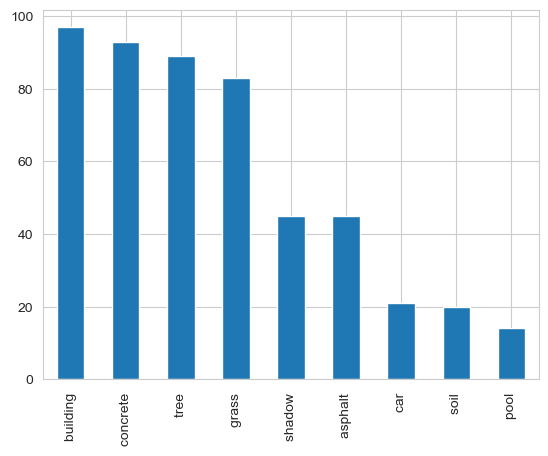

In [9]:
df['class'].value_counts().plot.bar()

For each category, there are only 15 to 30 samples, which means features is more than the observations.

# plot the data

In [10]:
pca = PCA()
data_pca = pca.fit_transform(df.iloc[:, 1:], df['class'])
data_pca = pd.DataFrame(data_pca)

In [11]:
variance_table_pca = pd.DataFrame({'variance': pca.explained_variance_ratio_,
              'cumulative variance': pca.explained_variance_ratio_.cumsum()}).T
variance_table_pca

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
variance,0.802372,0.092067,0.038859,0.023233,0.013366,0.009879,0.005802,0.004032,0.003554,0.001786,...,2.785222e-13,1.873129e-13,1.258996e-13,9.526769e-14,4.644567e-14,3.825236e-14,3.268677e-14,1.753529e-14,1.466677e-14,9.766675e-15
cumulative variance,0.802372,0.894439,0.933298,0.956531,0.969897,0.979776,0.985578,0.989610,0.993163,0.994949,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
plot_pca = pd.concat([df.iloc[:,0], data_pca.iloc[:,:3]], axis=1)
plot_pca

,class,0,1,2
0,concrete,-793.835735,-3960.638884,-1203.208077
1,shadow,-9296.244666,1321.093471,582.147297
2,shadow,-4172.529664,95.962996,1792.940592
3,tree,-9106.793587,242.799547,-484.052794
4,asphalt,-7731.581646,720.370106,-414.875596
...,...,...,...,...
502,building,6152.142047,5493.655253,1305.630863
503,grass,-3387.826268,1406.490859,177.813394
504,concrete,12960.152849,-3120.645916,3609.057199
505,building,-3279.031058,1862.496009,-831.112578


Text(0.5, 1.0, '2D data plot based on first two PCA component')

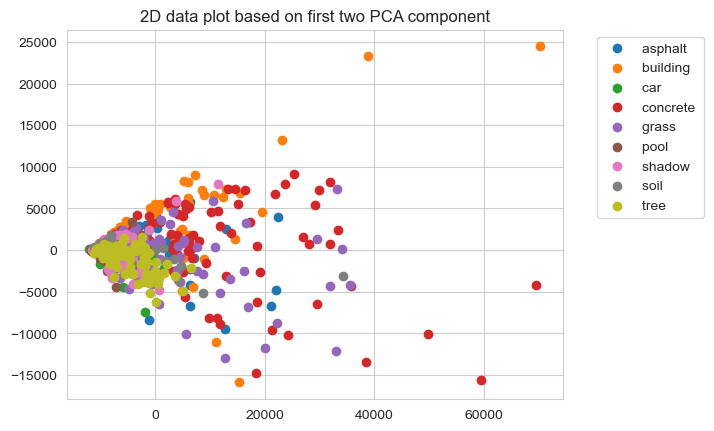

In [13]:
groups = plot_pca.groupby('class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.iloc[:,1], group.iloc[:,2], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.3,1))
ax.set_title('2D data plot based on first two PCA component')

Text(0.5, 0.92, '3D data plot based on first two PCA component')

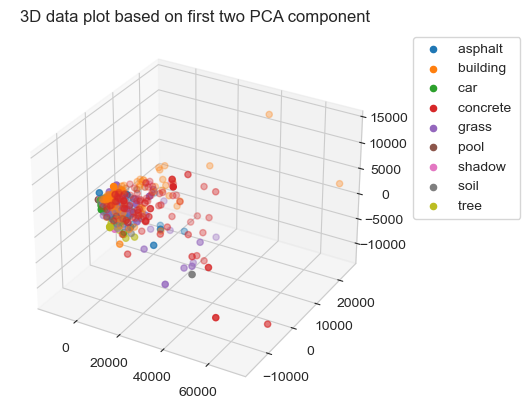

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], group.iloc[:, 3], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('3D data plot based on first two PCA component')

The plot doesn't look good, most of the points crowd together. This may cause be the magnitudes of some features.

In [15]:
df.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,2.025720,562.504931,1.237574,165.612939,2.187081,2.277318,166.290355,162.291953,168.256667,10.725227,...,24.601144,2.931657,0.817712,0.597732,8.048698,1.455838,0.653905,0.027436,1398.706114,1101.998185
std,0.619254,698.655240,0.561988,63.230806,0.874054,0.718441,59.217648,73.455101,69.702475,4.968761,...,12.203441,4.942887,0.106007,0.197505,0.787912,0.451781,0.251287,0.133834,1097.323462,533.927869
min,1.000000,22.000000,0.000000,26.850000,1.000000,1.040000,22.910000,26.520000,31.110000,3.550000,...,2.650000,1.000000,0.200000,0.100000,5.690000,0.240000,0.030000,-0.360000,34.000000,211.270000
25%,1.580000,159.000000,0.840000,127.485000,1.650000,1.715000,146.460000,97.585000,111.715000,6.985000,...,14.485000,1.375000,0.770000,0.455000,7.370000,1.160000,0.470000,-0.080000,601.000000,726.745000
50%,1.950000,323.000000,1.210000,170.650000,2.000000,2.180000,189.630000,158.280000,167.750000,9.290000,...,22.380000,1.920000,0.840000,0.610000,8.020000,1.440000,0.710000,-0.020000,1148.000000,1011.230000
75%,2.380000,681.500000,1.565000,224.825000,2.490000,2.675000,206.780000,237.375000,238.480000,13.330000,...,33.825000,2.800000,0.890000,0.760000,8.750000,1.775000,0.860000,0.145000,1874.000000,1335.640000
max,4.530000,5767.000000,3.520000,245.870000,8.070000,5.410000,239.370000,253.610000,253.630000,30.870000,...,61.340000,64.700000,0.970000,1.000000,9.570000,2.410000,1.000000,0.370000,8896.000000,3619.280000


try standardize dataset

In [16]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df.iloc[:, 1:])

In [17]:
pca = PCA()
data_standardized_pca = pca.fit_transform(data_standardized)

In [18]:
df.iloc[:, 1:25]

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40
0,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,...,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.32,131,0.81
1,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,...,0.85,6.75,1.81,0.73,-0.14,220,3331.33,1.08,1353,0.46
2,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,...,0.86,6.51,1.82,0.69,-0.11,124,2816.16,1.75,1094,1.91
3,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,...,0.50,7.28,1.03,0.89,0.26,170,2442.01,2.86,871,2.22
4,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,5.41,...,0.59,6.02,1.23,0.82,-0.13,130,4912.28,4.02,501,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.36,3146,0.90,244.97,1.44,1.39,229.86,252.47,252.58,7.56,...,0.84,6.50,2.12,0.55,-0.05,312,2397.07,1.36,4518,0.92
503,2.51,428,1.55,166.02,2.16,2.61,210.11,135.89,152.04,9.78,...,0.69,6.91,1.76,0.42,0.21,216,1872.73,2.52,894,1.60
504,2.45,659,1.38,219.30,1.68,2.53,189.64,233.14,235.12,5.63,...,0.83,6.26,2.08,0.37,-0.10,260,3597.18,2.20,1735,1.18
505,1.90,89,1.01,219.88,2.02,2.01,184.82,235.18,239.65,8.50,...,0.74,6.15,1.66,0.47,-0.12,76,4036.61,3.58,782,1.95


In [19]:
pd.DataFrame({'variance': pca.explained_variance_ratio_,
              'cumulative variance': pca.explained_variance_ratio_.cumsum()})

,variance,cumulative variance
0,2.938026e-01,0.293803
1,1.585743e-01,0.452377
2,1.033129e-01,0.555690
3,6.510621e-02,0.620796
4,5.051398e-02,0.671310
...,...,...
142,1.049726e-11,1.000000
143,9.111877e-12,1.000000
144,5.145675e-12,1.000000
145,4.380751e-12,1.000000


It needs at least 15 components to cover 90% of the variance.

In [20]:
df_standardized_pca = pd.concat([df['class'], pd.DataFrame(data_standardized_pca)], axis=1)
groups = df_standardized_pca.groupby(by='class')

Text(0.5, 1.0, '2D standard data plot based on first three PCA component')

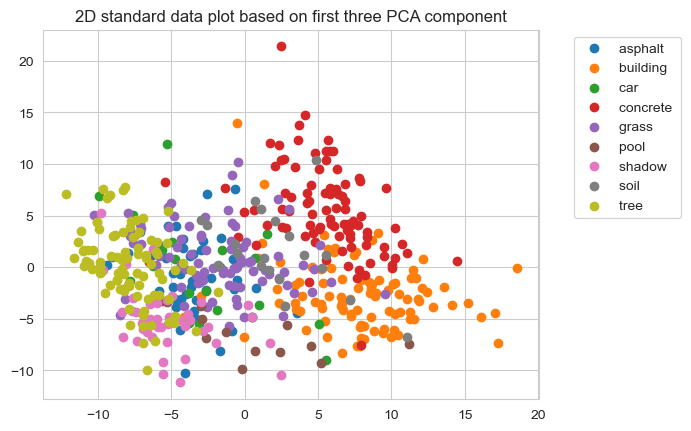

In [21]:
fig = plt.figure()
ax = fig.subplots()
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set_title('2D standard data plot based on first three PCA component')

Text(0.5, 0.92, '3D standard data plot based on first three PCA component')

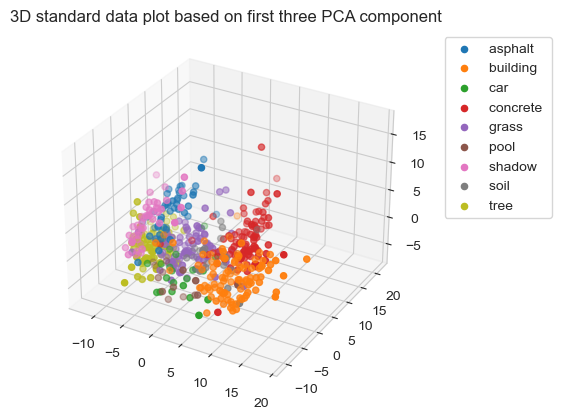

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], group.iloc[:, 3], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('3D standard data plot based on first three PCA component')

Take first 15 components, which covers around 90% of the variance, to build a multiple logistic regression.

# Modeling with PCA

make PCA dataset

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(data_standardized, y_in_ohc, train_size=0.9, random_state=42)
pca = PCA().fit(X_train, y_train)

In [24]:
print(X_train.shape, X_valid.shape)

(456, 147) (51, 147)


In [25]:
variance_table_pca = pd.DataFrame({'variance': pca.explained_variance_ratio_,
              'cumulative variance': pca.explained_variance_ratio_.cumsum()}).T
variance_table_pca

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
variance,0.293915,0.155742,0.105484,0.063327,0.052980,0.047526,0.027126,0.024954,0.022935,0.019272,...,9.152537e-07,5.690711e-07,4.240159e-07,2.868459e-11,1.315612e-11,9.897862e-12,8.844597e-12,4.879131e-12,4.024704e-12,2.557865e-12
cumulative variance,0.293915,0.449657,0.555141,0.618468,0.671448,0.718974,0.746100,0.771054,0.793990,0.813261,...,9.999990e-01,9.999996e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [26]:
index_of_90 = np.argmax(variance_table_pca.loc['cumulative variance'] > 0.9)
index_of_90

18

In [27]:
clf = MultiOutputClassifier(LogisticRegression()).fit(pca.transform(X_train)[:, :index_of_90 + 1], y_train)
y_pred = clf.predict(pca.transform(X_valid)[:, :index_of_90 + 1])
y_pred.shape

(51, 9)

In [28]:
comp = (np.argmax(y_pred, axis=1) == np.argmax(y_valid.to_numpy(), axis=1))
acc = np.sum(comp)/len(comp)
print('accuracy: {:.4f}%'.format(100* acc))

accuracy: 62.7451%


In [29]:
df_test = pd.read_csv('data/training.csv')

In [30]:
X_test = StandardScaler().fit_transform(df_test.iloc[:, 1:])
y_test = pd.get_dummies(df_test['class'])

In [31]:
y_pred = clf.predict(pca.transform(X_test)[:, :index_of_90 + 1])
comp = (np.argmax(y_pred, axis=1) == np.argmax(y_test.to_numpy(), axis=1))
acc = np.sum(comp)/len(comp)
print('accuracy on test data: {:.4f}%'.format(100* acc))

accuracy on test data: 58.9286%


taking 90% of the variance gives the result 58.8235% accuracy

Try taking 95% of the variance, which means first 24 component

In [32]:
index_of_95 = np.argmax(variance_table_pca.loc['cumulative variance'] > 0.95)
index_of_95

29

In [33]:
clf = MultiOutputClassifier(LogisticRegression()).fit(pca.transform(X_train)[:, :index_of_95 + 1], y_train)
y_pred = clf.predict(pca.transform(X_valid)[:, :index_of_95 + 1])
comp = (np.argmax(y_pred, axis=1) == np.argmax(y_valid.to_numpy(), axis=1))
acc = np.sum(comp)/len(comp)
print('accuracy: {:.4f}%'.format(100* acc))

accuracy: 60.7843%


The accuracy didn't improve anymore.

In [34]:
y_pred = clf.predict(pca.transform(X_test)[:, :index_of_95 + 1])
comp = (np.argmax(y_pred, axis=1) == np.argmax(y_test.to_numpy(), axis=1))
acc = np.sum(comp)/len(comp)
print('accuracy on test data: {:.4f}%'.format(100* acc))

accuracy on test data: 67.2619%


In [35]:
valid_acc_PCA = list()
test_acc_PCA = list()
ratios = np.linspace(0.7, 0.99, 15)
n_components = [np.argmax(variance_table_pca.loc['cumulative variance'] > r) + 1 for r in ratios]
for n in n_components:
    clf = MultiOutputClassifier(LogisticRegression(max_iter=200)).fit(pca.transform(X_train)[:, :n], y_train)
    y_pred = clf.predict(pca.transform(X_valid)[:, :n])
    comp = (np.argmax(y_pred, axis=1) == np.argmax(y_valid.to_numpy(), axis=1))
    valid_acc_PCA.append(np.mean(comp))
    y_pred = clf.predict(pca.transform(X_test)[:, :n])
    comp = (np.argmax(y_pred, axis=1) == np.argmax(y_test.to_numpy(), axis=1))
    test_acc_PCA.append(np.mean(comp))

(0.0, 1.0)

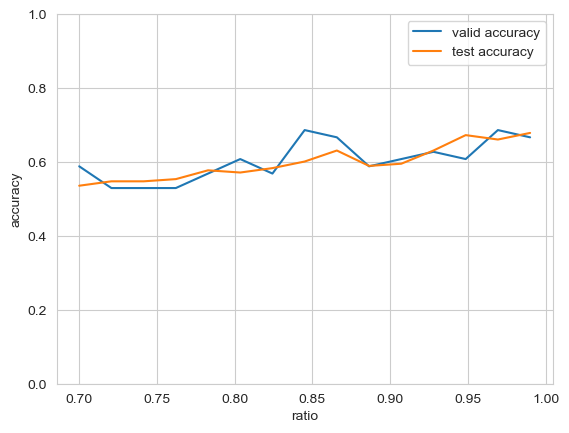

In [36]:
fig = plt.figure()
ax = fig.gca()
ax.plot(ratios, valid_acc_PCA, label='valid accuracy')
ax.plot(ratios, test_acc_PCA, label='test accuracy')
ax.set_xlabel('ratio')
ax.set_ylabel('accuracy')
ax.legend()
ax.set_ylim([0, 1])

# Selection by adding threshold to covariance matrix

In [37]:
def selecting_by_thresholding(X: np.ndarray,
                              y: np.ndarray,
                              X_test: np.ndarray,
                              y_test: np.ndarray,
                              cov_matrix: np.ndarray,
                              threshold_array: typing.Iterable,
                              cumulative_variance: float = 0.95) -> typing.Tuple:
    acc_array = list()
    better_model = None
    trans_U = None
    highest_acc = -1
    comp_highest_acc = -1
    at_threshold = -1
    for t in threshold_array:
        S = cov_matrix.copy()
        S[S < t] = 0
        # eigenvalue decomposition
        U, S, VT = np.linalg.svd(S)
        ratio_of_variances = S / np.sum(S)
        cumulative_variances = np.cumsum(ratio_of_variances)
        index_of_95 = np.argmax(cumulative_variances>cumulative_variance)
        U = U[:, :index_of_95+1]
        # U, S, VT = randomized_svd(S, n_components=n_components)

        # PCA
        pca = np.matmul(X, U)
        # modeling
        model = MultiOutputClassifier(LogisticRegression(max_iter=200)).fit(pca, y)
        y_pred = model.predict(np.matmul(X_test, U))
        comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
        acc = np.mean(comp)
        acc_array.append(acc)
        if highest_acc < acc:
            better_model = model
            trans_U = U
            highest_acc = acc
            comp_highest_acc = index_of_95
            at_threshold = t

    return acc_array, better_model, trans_U, highest_acc, highest_acc + 1, 100 * (at_threshold - threshold_array[0]) / (threshold_array[-1] - threshold_array[0])

highest accuracy 0.7843 with first 1.784313725490196 components (0.9 variance) at threshold 93.94%


Text(0, 0.5, 'accuracy')

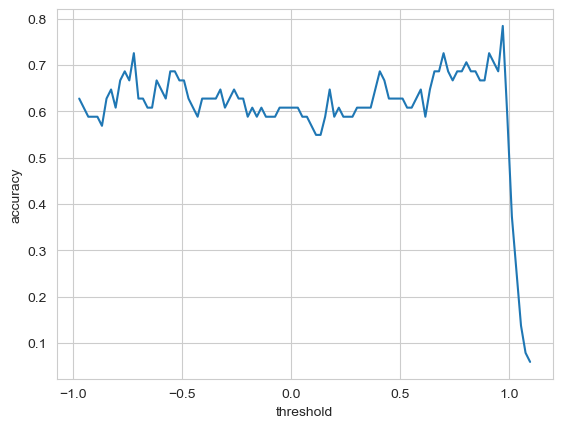

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(data_standardized, y_in_ohc, train_size=0.9, random_state=42)
cov_matrix = np.cov(X_train, rowvar=False)
lower_bound = np.min(cov_matrix)
upper_bound = np.max(cov_matrix)
threshold_array = np.linspace(lower_bound, upper_bound, 100)
acc_array, better_model, U, highest_acc, comp_highest_acc, at_threshold = selecting_by_thresholding(
    X_train, y_train, X_valid, y_valid, cov_matrix, threshold_array, cumulative_variance=0.9
)
print('highest accuracy {:.4f} with first {} components (0.9 variance) at threshold {:.2f}%'.format(
    highest_acc, comp_highest_acc, at_threshold
))
fig = plt.figure()
ax = fig.gca()
ax.plot(threshold_array, acc_array)
ax.set_xlabel('threshold')
ax.set_ylabel('accuracy')

In [39]:
y_pred = better_model.predict(np.matmul(X_test, U))
comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
np.mean(comp)

0.6488095238095238

highest accuracy 0.7647 with first 1.7647058823529411 components (0.95 variance) at threshold 93.94%


Text(0, 0.5, 'accuracy')

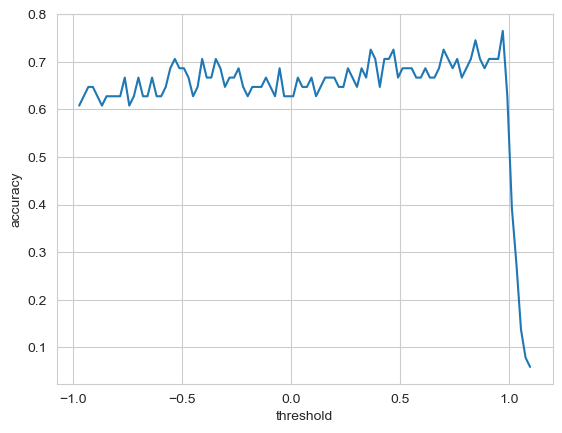

In [40]:
acc_array, better_model, U, highest_acc, comp_highest_acc, at_threshold = selecting_by_thresholding(
    X_train, y_train, X_valid, y_valid, cov_matrix, threshold_array, cumulative_variance=0.95
)
print('highest accuracy {:.4f} with first {} components (0.95 variance) at threshold {:.2f}%'.format(
    highest_acc, comp_highest_acc, at_threshold
))
fig = plt.figure()
ax = fig.gca()
ax.plot(threshold_array, acc_array)
ax.set_xlabel('threshold')
ax.set_ylabel('accuracy')

In [41]:
y_pred = better_model.predict(np.matmul(X_test, U))
comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
np.mean(comp)

0.6904761904761905

highest accuracy 0.7647 with first 1.7647058823529411 components (0.99 variance) at threshold 93.94%


Text(0, 0.5, 'accuracy')

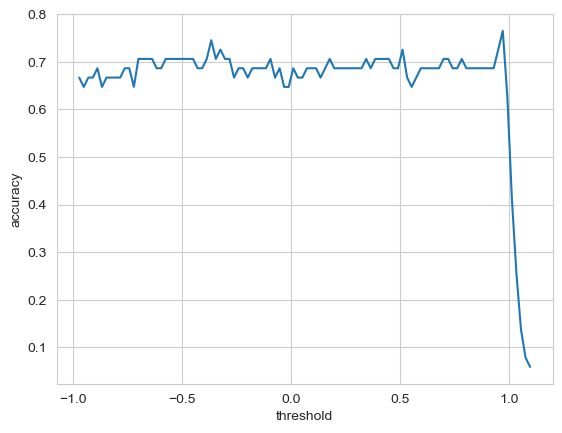

In [42]:
acc_array, better_model, U, highest_acc, comp_highest_acc, at_threshold = selecting_by_thresholding(
    X_train, y_train, X_valid, y_valid, cov_matrix, threshold_array, cumulative_variance=0.99
)
print('highest accuracy {:.4f} with first {} components (0.99 variance) at threshold {:.2f}%'.format(
    highest_acc, comp_highest_acc, at_threshold
))
fig = plt.figure()
ax = fig.gca()
ax.plot(threshold_array, acc_array)
ax.set_xlabel('threshold')
ax.set_ylabel('accuracy')

In [43]:
y_pred = better_model.predict(np.matmul(X_test, U))
comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
np.mean(comp)

0.6845238095238095

In [44]:
valid_acc_threshold = list()
test_acc_threshold = list()
for r in ratios:
    acc_array, better_model, U, highest_acc, comp_highest_acc, at_threshold = selecting_by_thresholding(
    X_train, y_train, X_valid, y_valid, cov_matrix, threshold_array, cumulative_variance=r
)
    valid_acc_threshold.append(highest_acc)
    y_pred = better_model.predict(np.matmul(X_test, U))
    comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
    test_acc_threshold.append(np.mean(comp))

In [45]:
print('''highest valid accuracy: {}
highest test accuracy: {}'''.format(np.max(valid_acc_threshold), np.max(test_acc_threshold)))

highest valid accuracy: 0.7843137254901961
highest test accuracy: 0.7023809523809523


(0.0, 1.0)

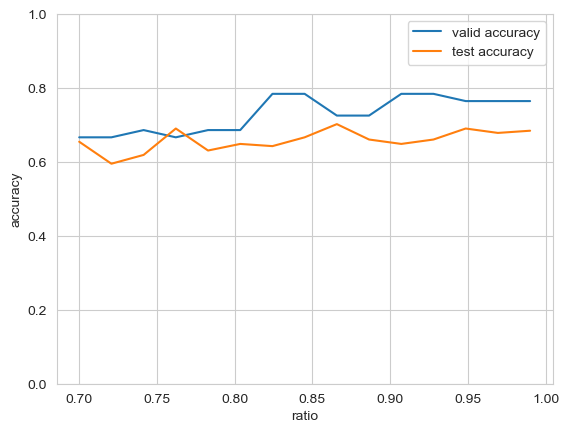

In [46]:
fig = plt.figure()
ax = fig.gca()
ax.plot(ratios, valid_acc_threshold, label='valid accuracy')
ax.plot(ratios, test_acc_threshold, label='test accuracy')
ax.set_xlabel('ratio')
ax.set_ylabel('accuracy')
ax.legend()
ax.set_ylim([0, 1])

(0.0, 1.0)

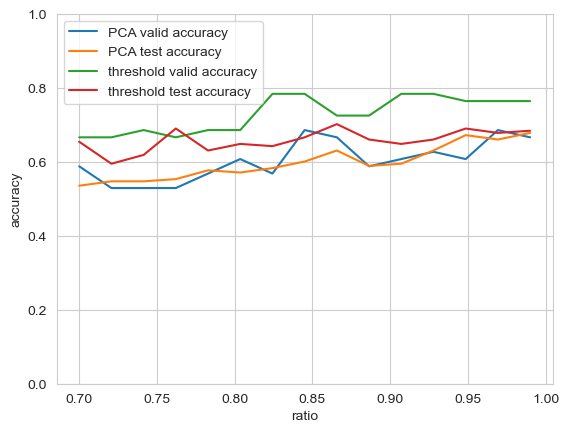

In [47]:
fig = plt.figure()
ax = fig.gca()
ax.plot(ratios, valid_acc_PCA, label='PCA valid accuracy')
ax.plot(ratios, test_acc_PCA, label='PCA test accuracy')
ax.plot(ratios, valid_acc_threshold, label='threshold valid accuracy')
ax.plot(ratios, test_acc_threshold, label='threshold test accuracy')
ax.set_xlabel('ratio')
ax.set_ylabel('accuracy')
ax.legend()
ax.set_ylim([0, 1])

# model selection by penalization approach

In [48]:
name2num = dict()
for i, n in enumerate(df['class'].unique()):
    name2num[n] = i
y_in_num = df['class'].apply(lambda x: name2num[x])

In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(data_standardized, y_in_ohc, train_size=0.9, random_state=42)

In [50]:
cv_logist = LogisticRegressionCV(Cs=np.logspace(-7, 3), cv=5, penalty='l2', solver='sag', n_jobs=4, max_iter=2000)
clf = cv_logist.fit(X_train, y_train.idxmax(axis=1))


the final coefficients

In [51]:
clf.coef_

array([[ 0.03445554,  0.00061297,  0.0458846 , ..., -0.14460827,
         0.08205884,  0.04658699],
       [-0.05093593,  0.07088295,  0.01671534, ..., -0.11194975,
        -0.0593466 , -0.07797712],
       [-0.06170991, -0.02619615, -0.04773733, ..., -0.04221374,
        -0.00962439,  0.03129775],
       ...,
       [ 0.00151473,  0.00356297, -0.0062557 , ...,  0.02531459,
        -0.06213502,  0.00194607],
       [ 0.024451  , -0.04707006, -0.01972975, ...,  0.02614298,
         0.02670643,  0.11712229],
       [ 0.02694494, -0.05141134, -0.02517895, ...,  0.14862162,
        -0.00990495, -0.0867962 ]])

Averaging the coefs_paths_ across folds provides a summary of how the coefficients change with different values of the hyperparameter C over all folds
.

Text(0.5, 0, 'l2 penalty')

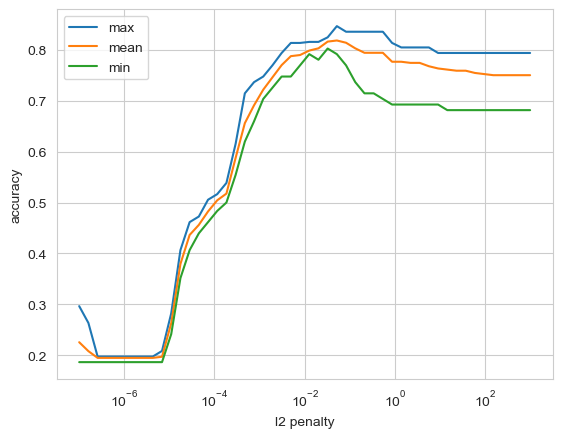

In [57]:
# since multiple classes follow the multinomial distribution, for each class the score is the same.
# [max, mean, min]
scores = {'max': np.max(clf.scores_['car '], axis=0),
          'mean': np.mean(clf.scores_['car '], axis=0),
          'min': np.min(clf.scores_['car '], axis=0)}
fig = plt.figure()
ax = fig.add_subplot()
for k,v in scores.items():
    ax.plot(clf.Cs_, v, label=k)
ax.legend()
ax.set_xscale('log')
ax.set_ylabel('accuracy')
ax.set_xlabel('l2 penalty')

Text(0, 0.5, 'coefficients')

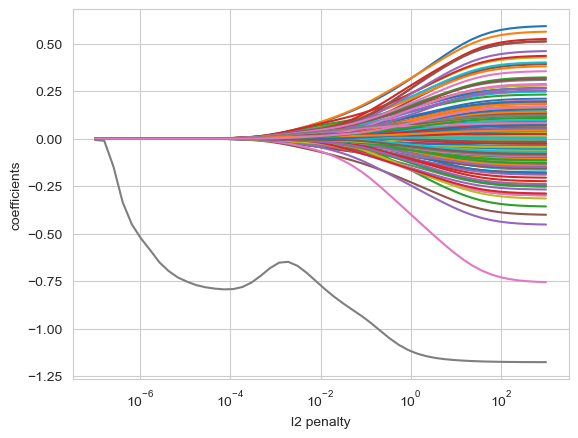

In [58]:
car_path = pd.DataFrame(clf.coefs_paths_['car '].mean(axis=0))
ax = plt.gca()
# car_path.plot(x=clf.Cs, ax=ax, legend=False)
for c in car_path.columns:
    ax.plot(clf.Cs_, car_path[c])
ax.set_xscale('log')
ax.set_xlabel('l2 penalty')
ax.set_ylabel('coefficients')

In [54]:
acc = (clf.predict(X_valid) == y_valid.idxmax(axis=1)).sum() / len(y_valid)
print('accuracy on the valid dataset same as PCA: {:.4f}%'.format(100*acc))

accuracy on the valid dataset same as PCA: 82.3529%


In [55]:
y_pred = clf.predict(X_test)
comp = (y_pred == y_test.idxmax(axis=1)).sum()
acc = np.sum(comp)/len(y_pred)
print('accuracy on test data: {:.4f}%'.format(100* acc))

accuracy on test data: 79.1667%


In [56]:
len(y_pred)

168